In [98]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-sales-data/car_prices.csv


In [99]:
import pandas as pd

In [100]:
df = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')

In [101]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [103]:
print(df.dtypes)

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object


In [104]:
# Data Cleaning

In [105]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')

# Preprocessing
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

df_preprocessed = preprocessor.fit_transform(df)

In [106]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [107]:
import pandas as pd
import numpy as np

# read in all our data

df = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')

# set seed for reproducibility
np.random.seed(0)

In [108]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
dtype: int64

In [109]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

1.3798298967319629


In [110]:
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
dtype: int64

In [111]:
# Read the CSV file and then fill NaN values

In [112]:
import pandas as pd

# Load dataset from a CSV file
df = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')  # Replace 'path/to/your/data.csv' with the actual file path

# Fill all NaN values with 0 or any other value you choose
df_filled = df.fillna(0)

print(df_filled)

        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558832  2015     Kia                 K900       Luxury      Sedan   
558833  2012     Ram                 2500  Power Wagon   Crew Cab   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      sedan   
558836  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer   color  \
0         automatic  5xyktca69fg566472    ca        5.0   16639.0   white   
1         automat

In [113]:
# Fill Na not suitable, so i decided to remove rows for NaN values

In [114]:
import pandas as pd

# Assuming 'df' is your DataFrame
df = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')

# Drop rows with any NaN values
df_cleaned = df.dropna()

print(df_cleaned)


        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558831  2011     BMW             5 Series         528i      Sedan   
558833  2012     Ram                 2500  Power Wagon   Crew Cab   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      sedan   
558836  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer  color  \
0         automatic  5xyktca69fg566472    ca        5.0   16639.0  white   
1         automatic

In [115]:
# Save the cleaned DataFrame to a CSV file

df_cleaned.to_csv('/kaggle/working/carprices2.csv', index=False)

In [116]:
df_cleaned

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [117]:
df_cleaned = pd.read_csv('/kaggle/working/carprices2.csv')

In [118]:
df_cleaned.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [119]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472325 entries, 0 to 472324
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 57.7+ MB


In [120]:
# Recheck missing number

In [121]:
# get the number of missing data points per column
missing_values_count = df_cleaned.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
dtype: int64

In [122]:
# All data have been cleaned . 

In [123]:
# One-Hot Encoding Categorical Variables

In [124]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['sellingprice'])

In [125]:
df_cleaned

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,sellingprice_161000.0,sellingprice_163000.0,sellingprice_165000.0,sellingprice_167000.0,sellingprice_169000.0,sellingprice_169500.0,sellingprice_171500.0,sellingprice_173000.0,sellingprice_183000.0,sellingprice_230000.0
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,...,False,False,False,False,False,False,False,False,False,False
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,...,False,False,False,False,False,False,False,False,False,False
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,...,False,False,False,False,False,False,False,False,False,False
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,...,False,False,False,False,False,False,False,False,False,False
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,...,False,False,False,False,False,False,False,False,False,False
472321,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,...,False,False,False,False,False,False,False,False,False,False
472322,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,...,False,False,False,False,False,False,False,False,False,False
472323,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,...,False,False,False,False,False,False,False,False,False,False


In [126]:
df_encoded = pd.get_dummies(df, columns=['model'])

In [127]:
df_encoded

,year,make,trim,body,transmission,vin,state,condition,odometer,color,...,model_wave,model_windstar,model_wrangler,model_x-trail,model_x3,model_xA,model_xB,model_xD,model_yaris,model_yukon
0,2015,Kia,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,...,False,False,False,False,False,False,False,False,False,False
1,2015,Kia,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,...,False,False,False,False,False,False,False,False,False,False
2,2014,BMW,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,...,False,False,False,False,False,False,False,False,False,False
3,2015,Volvo,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,...,False,False,False,False,False,False,False,False,False,False
4,2014,BMW,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,...,False,False,False,False,False,False,False,False,False,False
558833,2012,Ram,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,...,False,False,False,False,False,False,False,False,False,False
558834,2012,BMW,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,...,False,False,False,False,False,False,False,False,False,False
558835,2015,Nissan,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,...,False,False,False,False,False,False,False,False,False,False


In [128]:
df_cleaned.describe()

,year,condition,odometer,mmr
count,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964
std,3.822151,13.286866,51939.586894,9532.229273
min,1990.000000,1.000000,1.000000,25.000000
25%,2008.000000,24.000000,28137.000000,7425.000000
50%,2012.000000,35.000000,51085.000000,12300.000000
75%,2013.000000,41.000000,96590.000000,18300.000000
max,2015.000000,49.000000,999999.000000,182000.000000


In [129]:
# Data Visualization

In [130]:
# Price Distribution

In [131]:
# Verify the column names, especially for the date column
print(df_cleaned.columns)

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer',
       ...
       'sellingprice_161000.0', 'sellingprice_163000.0',
       'sellingprice_165000.0', 'sellingprice_167000.0',
       'sellingprice_169000.0', 'sellingprice_169500.0',
       'sellingprice_171500.0', 'sellingprice_173000.0',
       'sellingprice_183000.0', 'sellingprice_230000.0'],
      dtype='object', length=1821)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


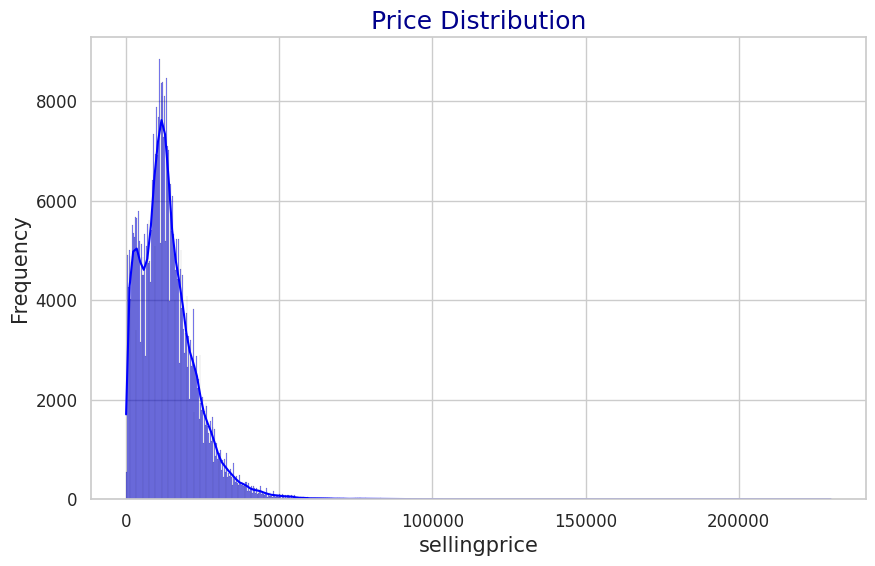

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame
df_cleaned = pd.read_csv('/kaggle/working/carprices2.csv')

# Set the style
sns.set(style='whitegrid')  # Set the background to white grid for better readability

# Increase the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the histogram with Kernel Density Estimate (KDE)
sns.histplot(df_cleaned['sellingprice'], kde=True, color='blue', edgecolor='black')

# Add a title and labels for better readability
plt.title('Price Distribution', fontsize=18, color='darkblue')  # Title with larger font and colored
plt.xlabel('sellingprice', fontsize=15)  # X-axis label with larger font
plt.ylabel('Frequency', fontsize=15)  # Y-axis label with larger font

# Customize tick parameters for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [ ]:
# The distribution of selling prices across different conditions can indicate consumer preferences for vehicle condition.

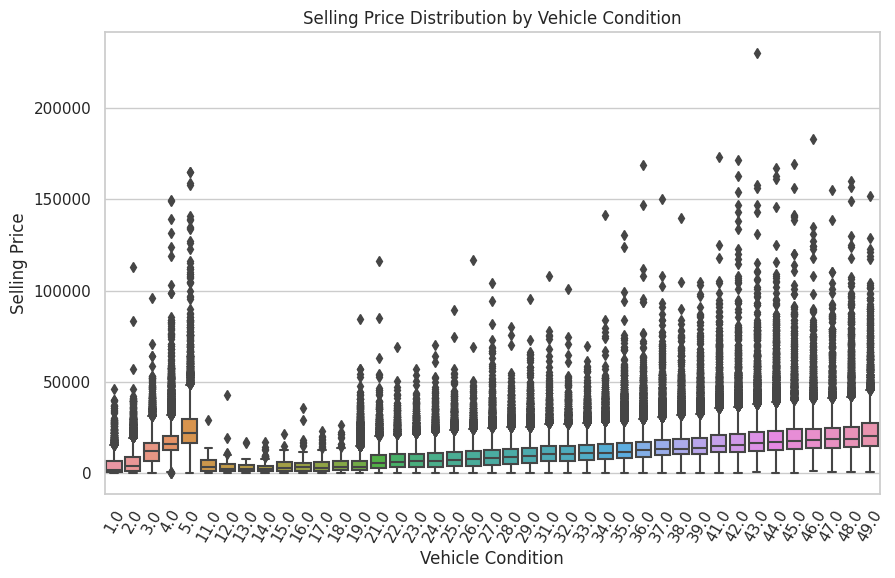

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_cleaned = pd.read_csv('/kaggle/working/carprices2.csv')

plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='sellingprice', data=df_cleaned)
plt.title('Selling Price Distribution by Vehicle Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Selling Price')
plt.xticks(rotation=60) # Rotate labels if necessary for better readability
plt.show()

In [136]:
# Price vs. Model by Condition

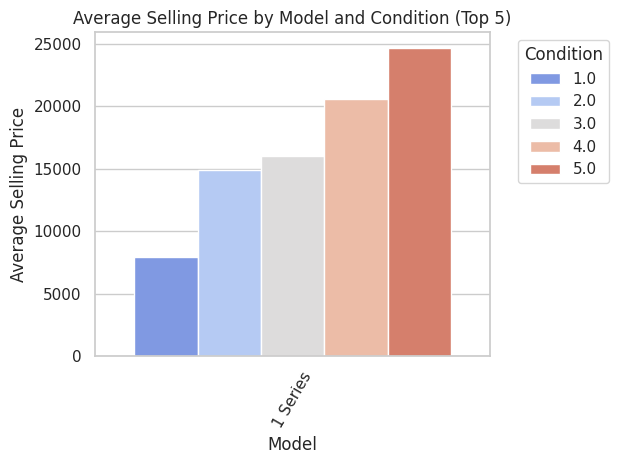

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your 'avg_prices' DataFrame ready 

# Modify your data to only focus on the first 5 rows
avg_prices_head = avg_prices.head(5)

# Create the bar graph using the top 5 rows
sns.barplot(x='model', y='sellingprice', hue='condition', data=avg_prices_head, palette='coolwarm')

plt.title('Average Selling Price by Model and Condition (Top 5)') 
plt.xlabel('Model')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=60)  # Rotate model names for better readability

# Move the legend outside the plot to avoid covering the bars
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [141]:
# Models are most popular based on the number of transactions.

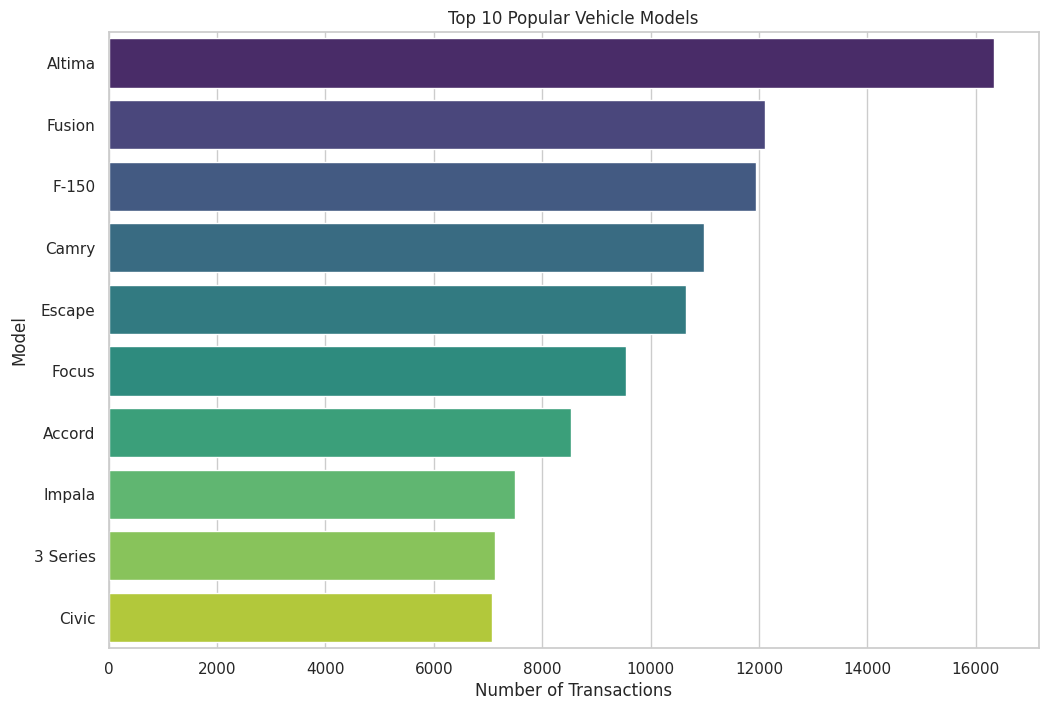

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_cleaned = pd.read_csv('/kaggle/working/carprices2.csv')

# Calculate the average selling price for each model and condition
avg_prices = df_cleaned.groupby(['model', 'condition'])['sellingprice'].mean().reset_index()

# Calculate the number of transactions for each model
model_popularity = df_cleaned['model'].value_counts().reset_index()
model_popularity.columns = ['model', 'transactions']

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='transactions', y='model', data=model_popularity.head(10), palette="viridis")
plt.title('Top 10 Popular Vehicle Models')
plt.xlabel('Number of Transactions')
plt.ylabel('Model')
plt.show()

In [143]:
# Price varies across different models gives insight into consumer price sensitivity

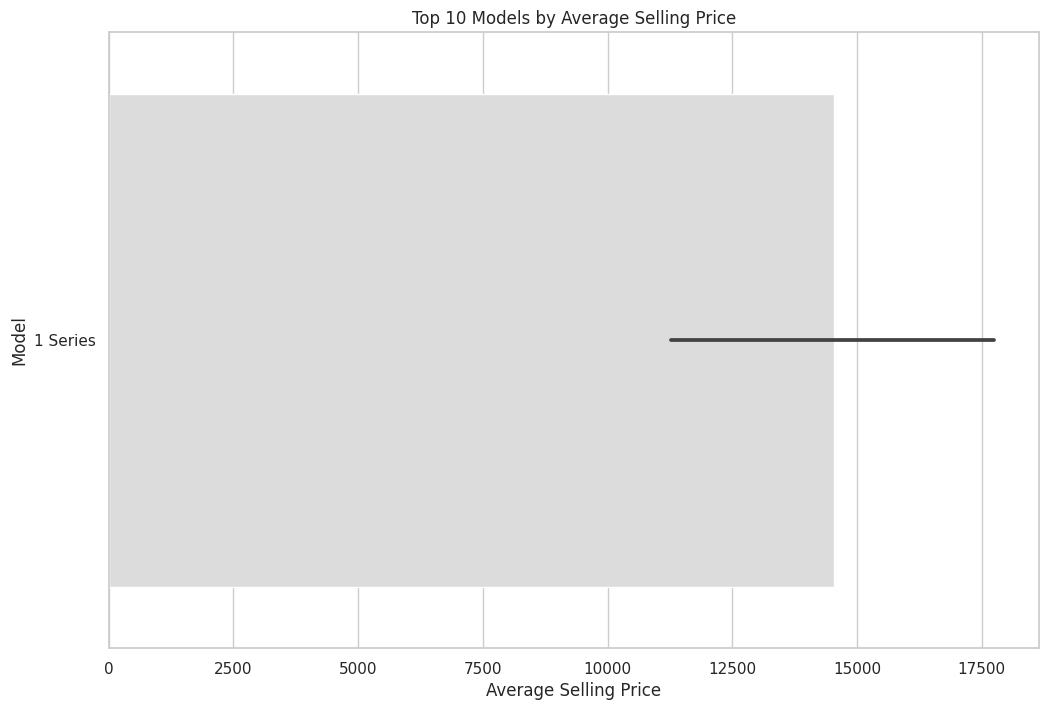

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
df_cleaned = pd.read_csv('/kaggle/working/carprices2.csv')

# Calculate the average selling price for each model and condition
avg_prices = df_cleaned.groupby(['model', 'condition'])['sellingprice'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='sellingprice', y='model', data=avg_prices.head(10), palette="coolwarm")
plt.title('Top 10 Models by Average Selling Price')
plt.xlabel('Average Selling Price')
plt.ylabel('Model')
plt.show()